<a href="https://colab.research.google.com/github/Jeba-Maliha/Machine-Learning/blob/main/CNN_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# define the kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])


In [ ]:
# prompt: file upload

from google.colab import files
uploaded = files.upload()
# now you can access uploaded files using their names
# e.g., if you uploaded a file named 'my_file.txt':
# with open('my_file.txt', 'r') as f:
#   file_content = f.read()
# print(file_content)


Saving img2.jpg to img2.jpg


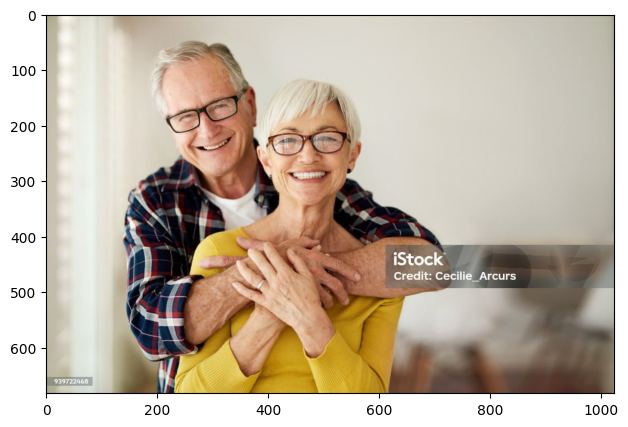

In [ ]:
# prompt: print image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming the uploaded image file is named 'image.jpg' (replace with your actual filename)
try:
  img = mpimg.imread('img2.jpg')
  imgplot = plt.imshow(img)
  plt.show()
except FileNotFoundError:
  print("Error: Image file not found. Please upload an image file.")
except Exception as e:
  print(f"An error occurred: {e}")

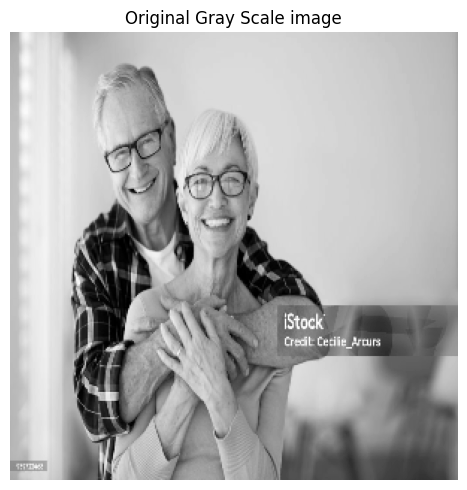

In [ ]:
# load the image
image = tf.io.read_file('img2.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();


# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

In [ ]:
# import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# define the kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])
# ... (rest of your code for loading and preprocessing the image) ...


# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)

# Reshape the kernel to have 4 dimensions [filter_height, filter_width, in_channels, out_channels]
# filter_height, filter_width = 3, 3
# in_channels = 1  # Assuming grayscale image
# out_channels = 1  # Number of output filters (can be adjusted)
kernel = tf.reshape(kernel, [3, 3, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.figure(figsize=(15, 5))

# ... (rest of your code for plotting the filtered image)

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Activation')

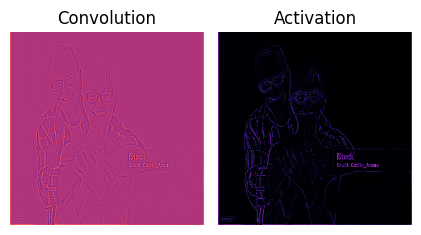

In [ ]:
# Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

# activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

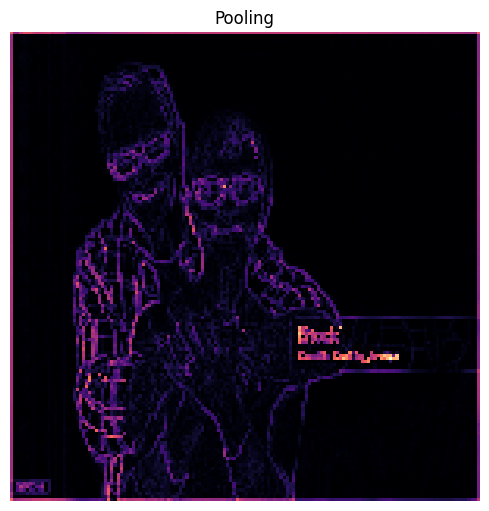

In [ ]:
# import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# define the kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])
# ... (rest of your code for loading and preprocessing the image) ...


# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
# image = tf.expand_dims(image, axis=0) # Remove this line to avoid the extra dimension

# Reshape the kernel to have 4 dimensions [filter_height, filter_width, in_channels, out_channels]
# filter_height, filter_width = 3, 3
# in_channels = 1  # Assuming grayscale image
# out_channels = 1  # Number of output filters (can be adjusted)
kernel = tf.reshape(kernel, [3, 3, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)


# Add a dimension for the batch size before convolution if it's not already present
image = tf.expand_dims(image, axis=0)

# convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.figure(figsize=(15, 5))

# ... (rest of your code for plotting the filtered image)

# ... (In your pooling layer code) ...

# Pooling layer
pool = tf.nn.pool
# Remove the extra dimension using tf.squeeze before pooling:
image_detect_squeezed = tf.squeeze(image_detect, axis=1)
image_condense = pool(input=image_detect_squeezed,
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()